In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize


from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [3]:
data=pd.read_csv('data.csv',encoding = "ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [5]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


**TOP 10**

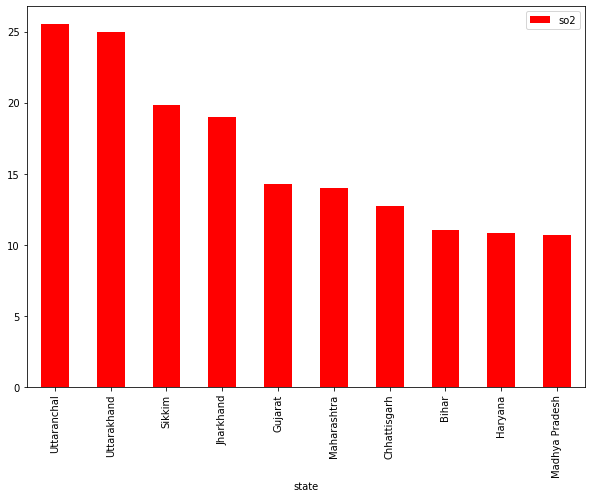

In [6]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r')
plt.show()

**BOTTOM 10**

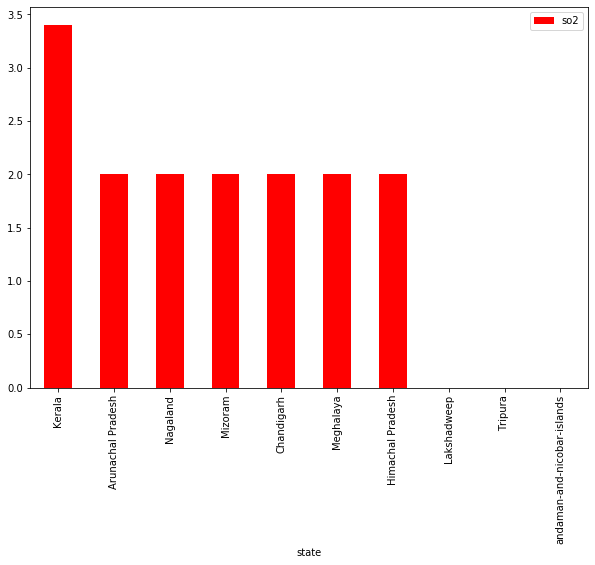

In [7]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).tail(10).plot.bar(color='r')
plt.show()

**TOP 10**

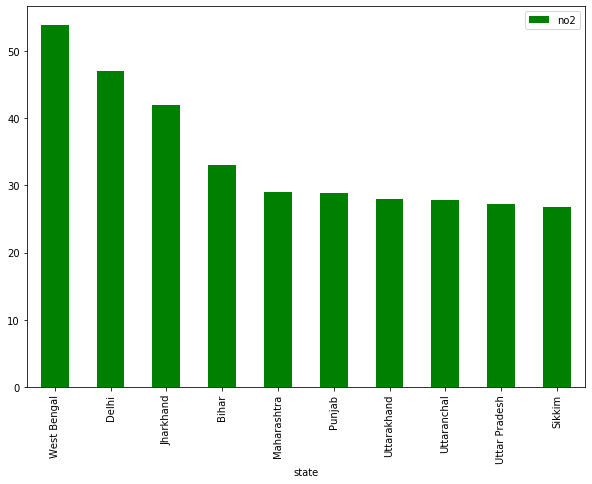

In [8]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

**BOTTOM 10**

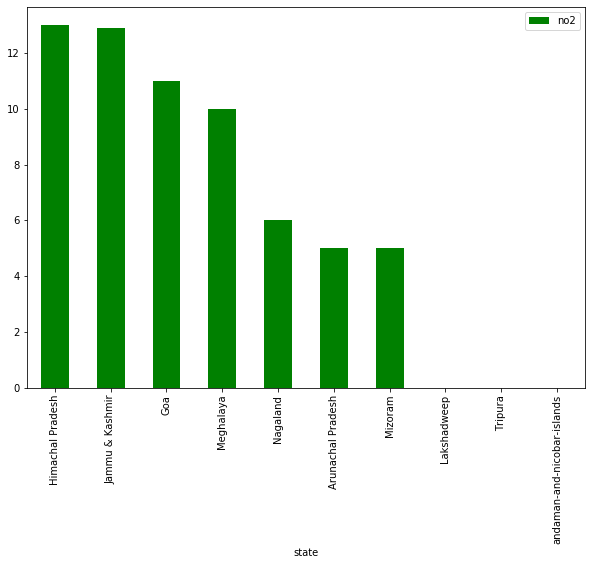

In [9]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).tail(10).plot.bar(color='g')
plt.show()

**TOP 10**

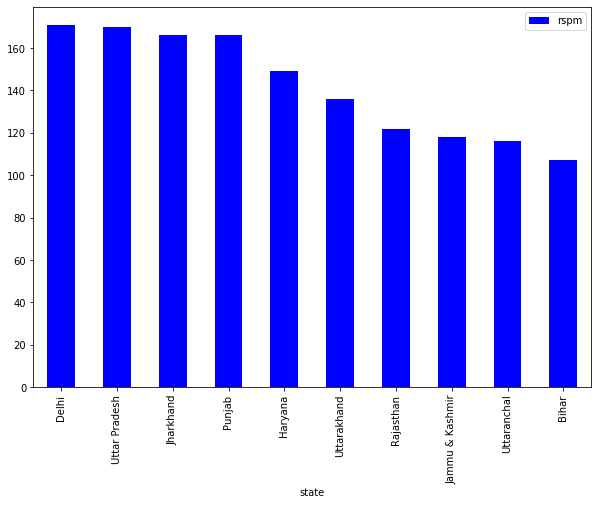

In [10]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='b')
plt.show()

**BOTTOM 10**

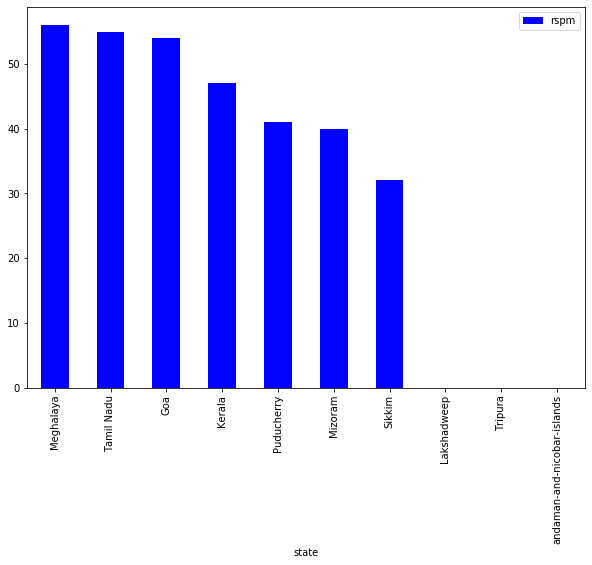

In [11]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).tail(10).plot.bar(color='b')
plt.show()

**TOP 10**

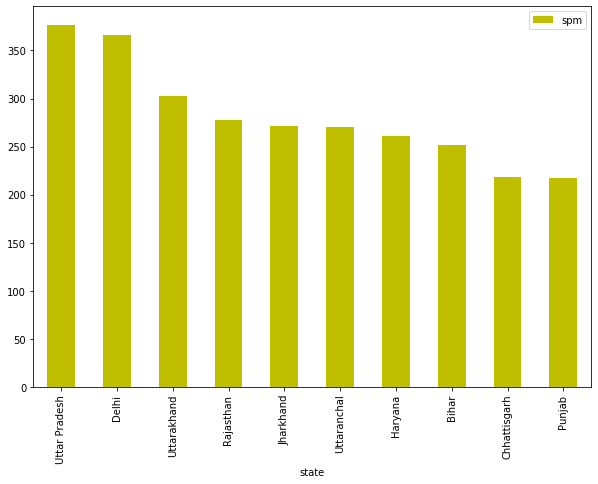

In [12]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='y')
plt.show()

**BOTTOM 10**

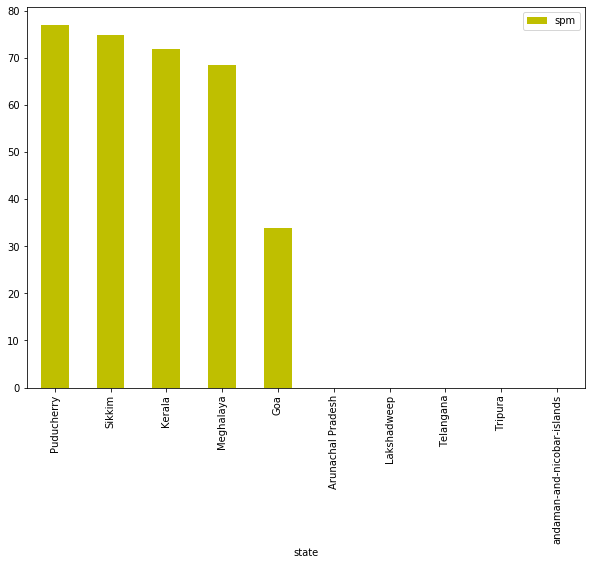

In [13]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).tail(10).plot.bar(color='y')
plt.show()

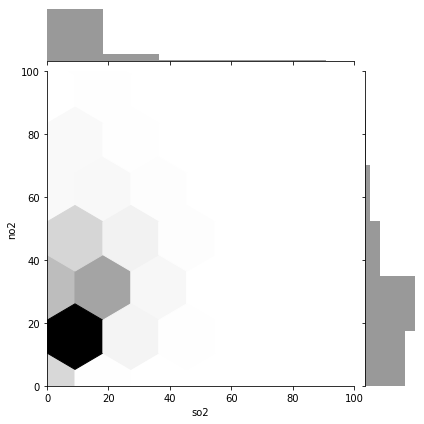

In [14]:
#Exploring relationship between proportion of Sulphur dioxide & Nitrogen dioxide
#sns.lmplot(x='so2',y='no2',data=data)
sns.jointplot(x='so2', y='no2', data=data,kind='hex',color='k',xlim={0,100}, ylim={0,100})

In [15]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

**SO2 Analysis**

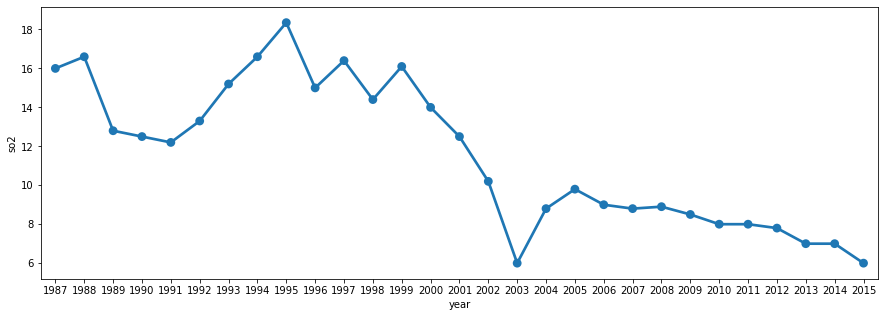

In [16]:
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='so2', data=df)

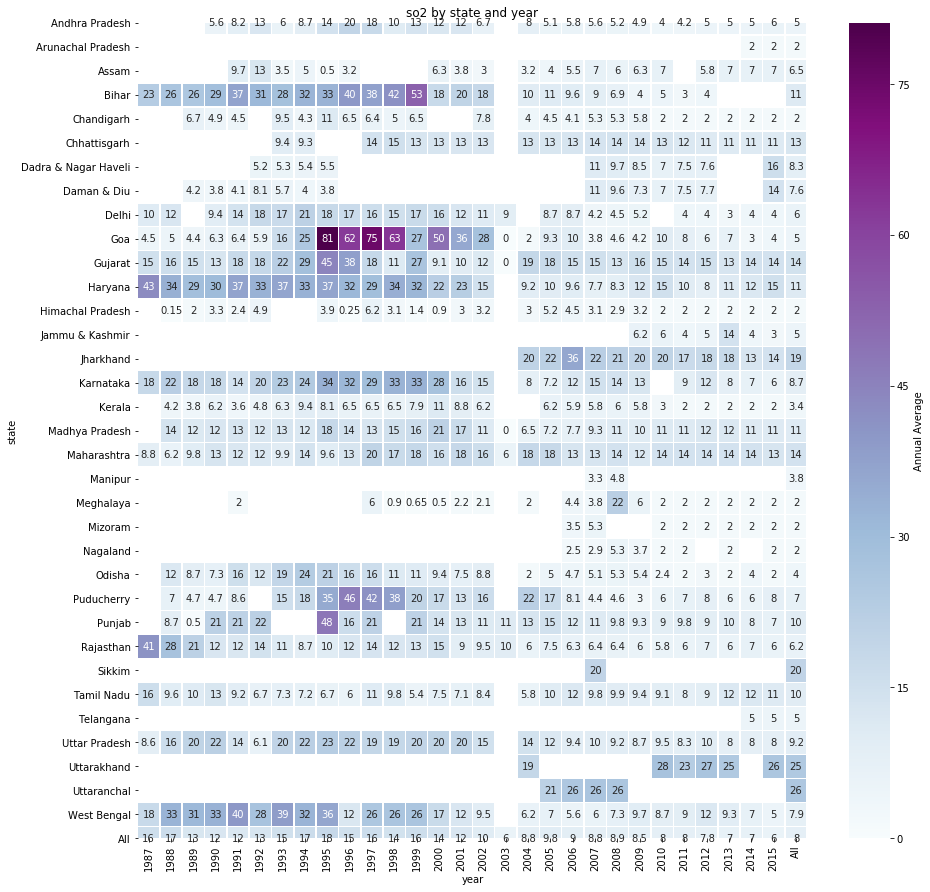

In [17]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

****NO2 Analysis**

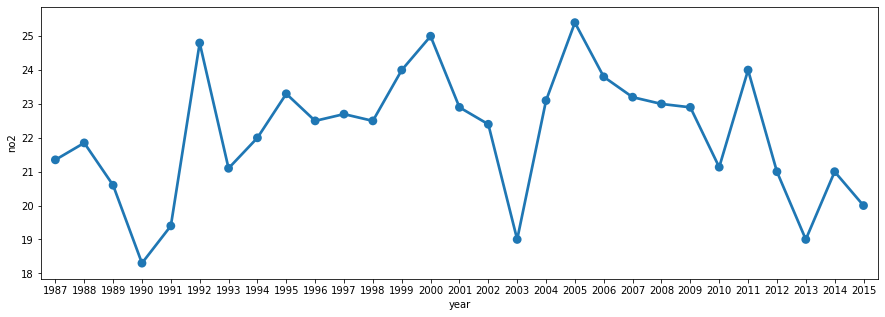

In [18]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='no2', data=df)

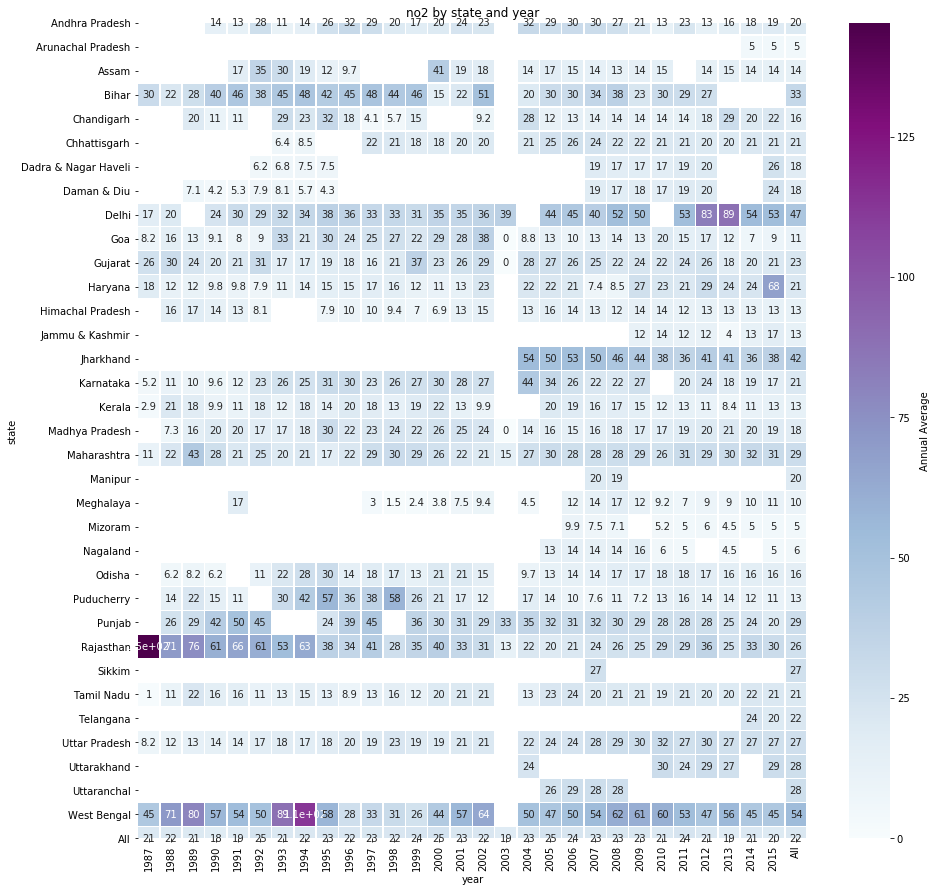

In [19]:
#Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

**CONCLUSION**

* Mainly Northern states have high air pollution
* South & North East states have less air pollution 



**If you have any opinion or any Suggestion Please Comment It **

In [20]:
grouped=data[['state','so2','no2','rspm']].groupby(["state"])

states=grouped.groups.keys()
X=grouped.mean();
print(X)

                            so2        no2        rspm
state                                                 
Andhra Pradesh         7.284845  21.704451   78.182824
Arunachal Pradesh      3.179104   5.469697   76.629213
Assam                  6.723263  14.793691   93.724912
Bihar                 19.381476  36.575525  123.705176
Chandigarh             2.676986  18.619404   96.587079
Chhattisgarh          12.846609  24.815961  126.472399
Dadra & Nagar Haveli   8.939587  18.293959   76.536530
Daman & Diu            8.192958  16.168926   73.749431
Delhi                  8.737273  53.489147  196.639771
Goa                    6.827913  12.506337   61.212766
Gujarat               16.656343  24.065631   98.244510
Haryana               14.064957  23.428311  149.860537
Himachal Pradesh       2.667013  13.658688   91.870202
Jammu & Kashmir        7.180521  12.213181  117.449483
Jharkhand             23.485794  43.366341  168.517763
Karnataka             10.223360  22.703718   79.375146
Kerala    

In [131]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [132]:
y = kmeans.predict(X)
clusters = np.unique(y)
for cluster in clusters:
    row_ix = np.where(y == cluster)
    print(row_ix)
    print(X.iloc[row_ix]['so2'])
    # show the plot
#plt.show()

(array([ 0,  1,  6,  7,  9, 15, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29]),)
state
Andhra Pradesh           7.284845
Arunachal Pradesh        3.179104
Dadra & Nagar Haveli     8.939587
Daman & Diu              8.192958
Goa                      6.827913
Karnataka               10.223360
Kerala                   5.322350
Manipur                  3.900000
Meghalaya                8.955908
Mizoram                  2.085009
Nagaland                 2.059736
Odisha                   5.275642
Puducherry              11.970639
Sikkim                  19.800000
Tamil Nadu              11.315134
Telangana                5.418609
Name: so2, dtype: float64
(array([ 2,  3,  4,  5, 10, 12, 13, 17, 18, 32, 33]),)
state
Assam                6.723263
Bihar               19.381476
Chandigarh           2.676986
Chhattisgarh        12.846609
Gujarat             16.656343
Himachal Pradesh     2.667013
Jammu & Kashmir      7.180521
Madhya Pradesh      11.587410
Maharashtra         17.367064
Uttaranchal       

In [133]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(centroids[:,2])
print(labels)

[[  7.54692465  16.38601405  66.99157615]
 [ 12.21756236  25.61234253 109.18053893]
 [ 14.49768621  33.33697683 165.20854678]]
[ 66.99157615 109.18053893 165.20854678]
[0 0 1 1 1 1 0 0 2 0 1 2 1 1 2 0 0 1 1 0 0 0 0 0 0 2 2 0 0 0 2 2 1 1]


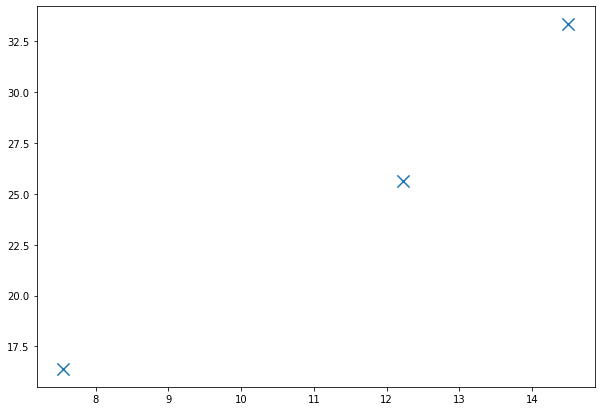

In [134]:
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

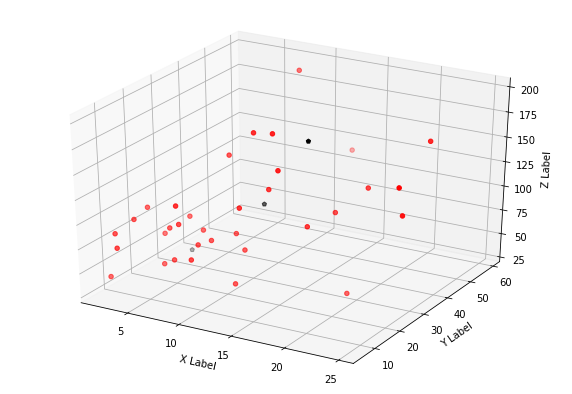

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X['so2']
y = X['no2']
z = X['rspm']
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(centroids[:,0],centroids[:,1], centroids[:,2], marker = "p", color = 'black')


In [136]:
y_ = kmeans.predict(X)
clusters = np.unique(y_)

Cluster 1


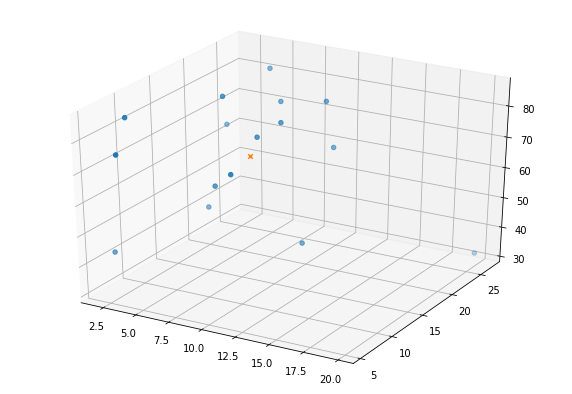

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cluster=0
row_ix = np.where(y_ == cluster)
print("Cluster 1")
x = X.iloc[row_ix]['so2']
y = X.iloc[row_ix]['no2']
z = X.iloc[row_ix]['rspm']
ax.scatter(x, y, z)
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], marker = "x")

cluster 2


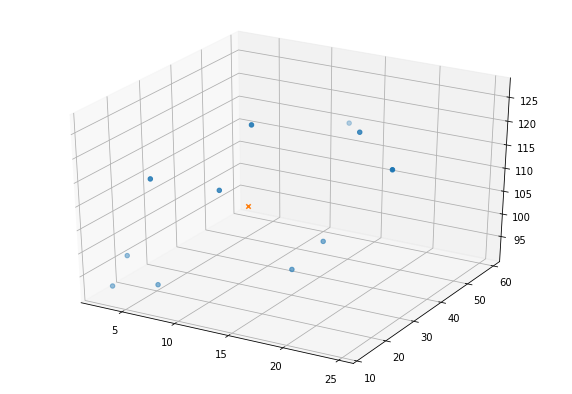

In [138]:
fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
cluster=1
row_ix = np.where(y_ == cluster)
print("cluster 2")
x = X.iloc[row_ix]['so2']
y = X.iloc[row_ix]['no2']
z = X.iloc[row_ix]['rspm']
bx.scatter(x, y, z)
bx.scatter(centroids[1,0], centroids[1,1], centroids[1,2], marker = "x")

cluster 3


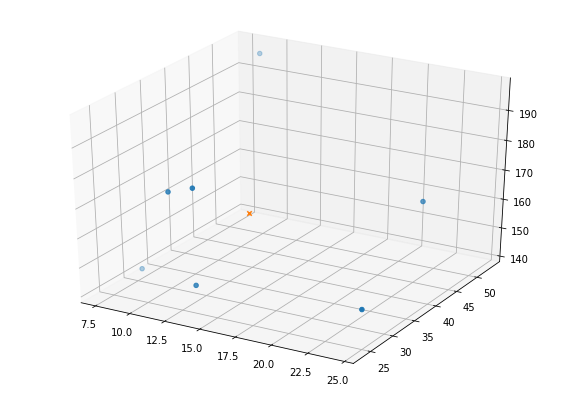

In [139]:
fig = plt.figure()
cx = fig.add_subplot(111, projection='3d')
cluster=2
row_ix = np.where(y_ == cluster)
print("cluster 3")
x = X.iloc[row_ix]['so2']
y = X.iloc[row_ix]['no2']
z = X.iloc[row_ix]['rspm']
cx.scatter(x, y, z)
cx.scatter(centroids[2,0], centroids[2,1], centroids[2,2], marker = "x")

In [140]:
Arr=[]
i=0;
for s in states:
    Arr.append([s,labels[i]])
    i+=1
Arr=pd.DataFrame(Arr)
print(Arr)

                       0  1
0         Andhra Pradesh  0
1      Arunachal Pradesh  0
2                  Assam  1
3                  Bihar  1
4             Chandigarh  1
5           Chhattisgarh  1
6   Dadra & Nagar Haveli  0
7            Daman & Diu  0
8                  Delhi  2
9                    Goa  0
10               Gujarat  1
11               Haryana  2
12      Himachal Pradesh  1
13       Jammu & Kashmir  1
14             Jharkhand  2
15             Karnataka  0
16                Kerala  0
17        Madhya Pradesh  1
18           Maharashtra  1
19               Manipur  0
20             Meghalaya  0
21               Mizoram  0
22              Nagaland  0
23                Odisha  0
24            Puducherry  0
25                Punjab  2
26             Rajasthan  2
27                Sikkim  0
28            Tamil Nadu  0
29             Telangana  0
30         Uttar Pradesh  2
31           Uttarakhand  2
32           Uttaranchal  1
33           West Bengal  1


In [47]:
for i in range(len(Arr)):
    if(Arr.iloc[i,1]==0):
        print(Arr.iloc[i,0]+" is moderately polluted")
    elif(Arr.iloc[i,1]==1):
        print(Arr.iloc[i,0]+" is less polluted")
    else:
        print(Arr.iloc[i,0]+" is among the most polluted")

Andhra Pradesh is among the most polluted
Arunachal Pradesh is among the most polluted
Assam is moderately polluted
Bihar is moderately polluted
Chandigarh is moderately polluted
Chhattisgarh is moderately polluted
Dadra & Nagar Haveli is among the most polluted
Daman & Diu is among the most polluted
Delhi is less polluted
Goa is among the most polluted
Gujarat is moderately polluted
Haryana is less polluted
Himachal Pradesh is moderately polluted
Jammu & Kashmir is moderately polluted
Jharkhand is less polluted
Karnataka is among the most polluted
Kerala is among the most polluted
Madhya Pradesh is moderately polluted
Maharashtra is moderately polluted
Manipur is among the most polluted
Meghalaya is among the most polluted
Mizoram is among the most polluted
Nagaland is among the most polluted
Odisha is among the most polluted
Puducherry is among the most polluted
Punjab is less polluted
Rajasthan is less polluted
Sikkim is among the most polluted
Tamil Nadu is among the most polluted


In [145]:
from sklearn.preprocessing import normalize
data_scaled = (X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,so2,no2,rspm
state,,,
Andhra Pradesh,7.284845,21.704451,78.182824
Arunachal Pradesh,3.179104,5.469697,76.629213
Assam,6.723263,14.793691,93.724912
Bihar,19.381476,36.575525,123.705176
Chandigarh,2.676986,18.619404,96.587079


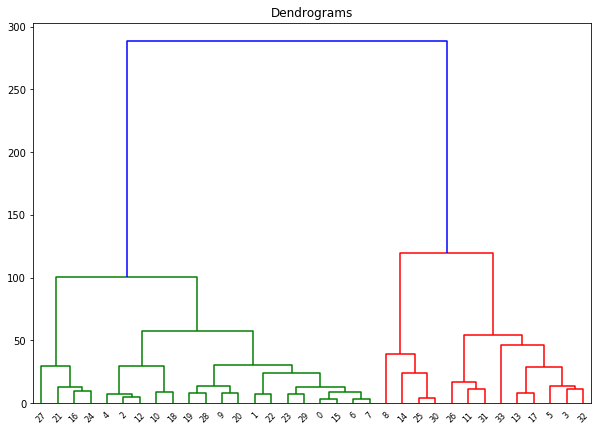

In [146]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

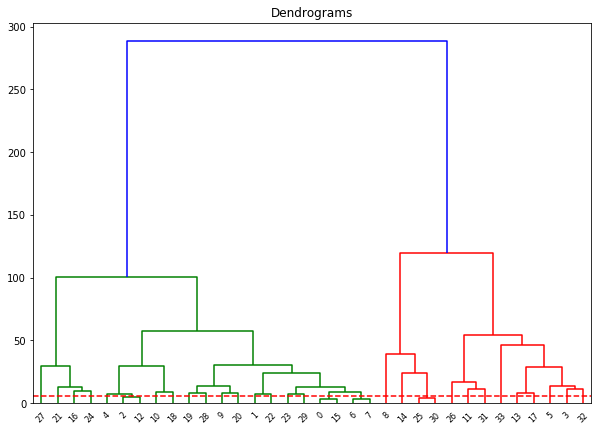

In [147]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [158]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

In [161]:
y = cluster.fit_predict(X)

In [167]:
Arr=[]
i=0;
for s in states:
    Arr.append([s,y[i]])
    i+=1
Arr=pd.DataFrame(Arr)
print(Arr)

                       0  1
0         Andhra Pradesh  0
1      Arunachal Pradesh  0
2                  Assam  0
3                  Bihar  1
4             Chandigarh  0
5           Chhattisgarh  1
6   Dadra & Nagar Haveli  0
7            Daman & Diu  0
8                  Delhi  2
9                    Goa  0
10               Gujarat  0
11               Haryana  1
12      Himachal Pradesh  0
13       Jammu & Kashmir  1
14             Jharkhand  2
15             Karnataka  0
16                Kerala  0
17        Madhya Pradesh  1
18           Maharashtra  0
19               Manipur  0
20             Meghalaya  0
21               Mizoram  0
22              Nagaland  0
23                Odisha  0
24            Puducherry  0
25                Punjab  2
26             Rajasthan  1
27                Sikkim  0
28            Tamil Nadu  0
29             Telangana  0
30         Uttar Pradesh  2
31           Uttarakhand  1
32           Uttaranchal  1
33           West Bengal  1


In [168]:
for i in range(len(Arr)):
    if(Arr.iloc[i,1]==0):
        print(Arr.iloc[i,0]+" is moderately polluted")
    elif(Arr.iloc[i,1]==1):
        print(Arr.iloc[i,0]+" is less polluted")
    else:
        print(Arr.iloc[i,0]+" is among the most polluted")

Andhra Pradesh is moderately polluted
Arunachal Pradesh is moderately polluted
Assam is moderately polluted
Bihar is less polluted
Chandigarh is moderately polluted
Chhattisgarh is less polluted
Dadra & Nagar Haveli is moderately polluted
Daman & Diu is moderately polluted
Delhi is among the most polluted
Goa is moderately polluted
Gujarat is moderately polluted
Haryana is less polluted
Himachal Pradesh is moderately polluted
Jammu & Kashmir is less polluted
Jharkhand is among the most polluted
Karnataka is moderately polluted
Kerala is moderately polluted
Madhya Pradesh is less polluted
Maharashtra is moderately polluted
Manipur is moderately polluted
Meghalaya is moderately polluted
Mizoram is moderately polluted
Nagaland is moderately polluted
Odisha is moderately polluted
Puducherry is moderately polluted
Punjab is among the most polluted
Rajasthan is less polluted
Sikkim is moderately polluted
Tamil Nadu is moderately polluted
Telangana is moderately polluted
Uttar Pradesh is amon